In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [6]:
model = models.Sequential()

In [7]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

c:\MyFolder\Projects\University\ml-masters-sem3\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [9]:
model.add(layers.Conv2D(128, (3, 3), activation='relu')) # Дополнительный сверточный слой

In [10]:
model.add(layers.Flatten())

In [11]:
model.add(layers.Dense(128, activation='relu'))  # Дополнительный полносвязный слой

In [12]:
model.add(layers.Dense(64, activation='relu'))

In [13]:
# model.add(layers.Dense(10, activation='softmax')) # Выходной слой

In [14]:
model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2009 - loss: 3.6648 - val_accuracy: 0.0980 - val_loss: 4.1589
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1011 - loss: 4.1589 - val_accuracy: 0.0980 - val_loss: 4.1589
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0982 - loss: 4.1589 - val_accuracy: 0.0980 - val_loss: 4.1589
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0993 - loss: 4.1589 - val_accuracy: 0.0980 - val_loss: 4.1589
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0982 - loss: 4.1589 - val_accuracy: 0.0980 - val_loss: 4.1589


In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Точность на тестовых данных: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0924 - loss: 4.1589
Точность на тестовых данных: 0.09799999743700027


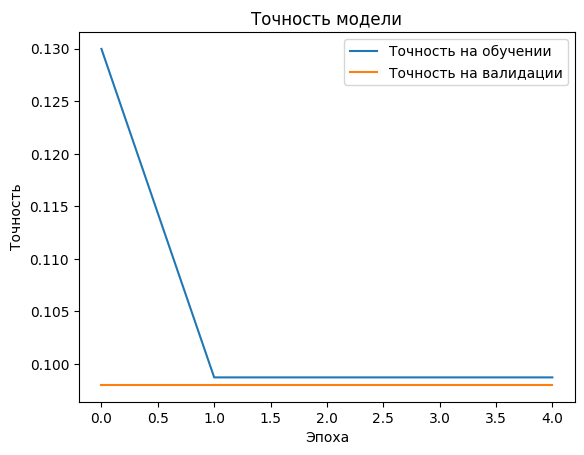

In [17]:
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на валидации')
plt.title('Точность модели')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()

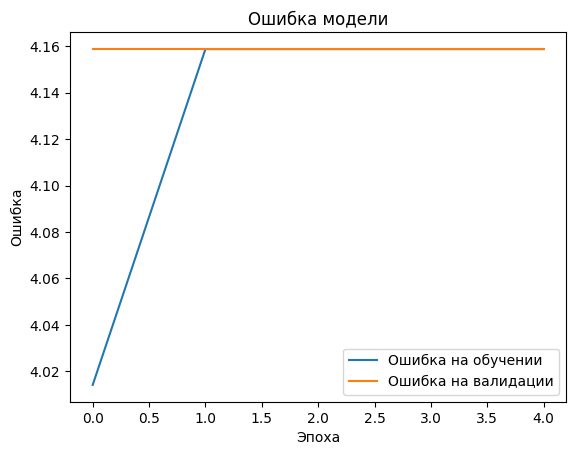

In [18]:
plt.plot(history.history['loss'], label='Ошибка на обучении')
plt.plot(history.history['val_loss'], label='Ошибка на валидации')
plt.title('Ошибка модели')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.show()